In [42]:
import datasets as k
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, SelectPercentile, SelectFwe
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal as mvn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import preprocessing
import importlib
importlib.reload(k)

<module 'datasets' from '/Users/kelvin/Data Mining and Analysis/Project/datasets.py'>

In [43]:
x,y = k.data_question2()

In [44]:
x.shape

(3000, 49)

In [14]:
scores = ['PANSS_Total', 'Bipolar_index', 'Pos_Chronic', 'Neg_Chronic', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16']
#ONLY VARIABLES
variables = ['PANSS_Total','Bipolar_index', 'Pos_Chronic', 'Neg_Chronic', 'PANSS_Total']
x_vars = x[scores]

## KMEANS

In [15]:
x =(x_vars-x_vars.mean())/x_vars.std()

In [16]:
#NORMALIZE
pd.set_option('display.max_columns', 500)
x =(x_vars-x_vars.mean())/x_vars.std()
predict = KMeans(n_clusters = 4, random_state=56).fit_predict(x)
x["cluster"] = predict + 1
x.groupby("cluster")[x.columns].mean().round(1)

,PANSS_Total,Bipolar_index,Pos_Chronic,Neg_Chronic,P1,P2,P3,P4,P5,P6,P7,N1,N2,N3,N4,N5,N6,N7,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,cluster
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.9,0.6,-0.8,0.6,0.1,0.4,0.4,0.4,0.4,0.3,-0.7,-0.5,-0.5,-0.5,-0.2,-0.6,-0.1,0.1,0.3,0.1,0.2,-0.3,0.2,-0.5,0.1,0.4,-0.1,-0.1,0.1,-0.2,0.3,0.0,0.0,1
2,-0.1,-1.0,-0.7,0.6,-0.6,-0.2,-0.6,-0.5,-0.5,-0.5,-0.3,0.6,0.5,0.5,0.5,0.2,0.5,0.1,-0.1,-0.3,-0.2,-0.2,0.3,-0.2,0.4,-0.1,-0.5,0.0,0.1,0.1,0.3,-0.3,-0.1,-0.0,2
3,1.2,0.2,0.9,0.9,0.7,0.8,0.6,0.5,0.3,0.7,0.5,0.5,0.6,0.6,0.6,0.5,0.6,0.5,0.2,0.4,0.1,0.5,0.5,0.3,0.4,0.5,0.7,0.5,0.6,0.3,0.5,0.5,0.7,0.6,3
4,-1.3,-0.2,-0.9,-0.9,-0.9,-0.9,-0.6,-0.6,-0.3,-0.8,-0.6,-0.5,-0.7,-0.7,-0.7,-0.5,-0.5,-0.8,-0.3,-0.6,-0.2,-0.6,-0.5,-0.4,-0.3,-0.6,-0.8,-0.4,-0.7,-0.7,-0.7,-0.6,-0.8,-0.7,4


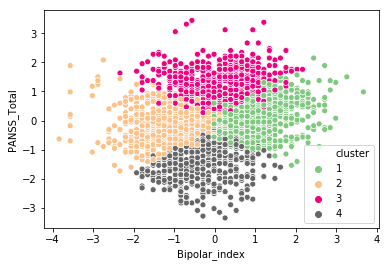

In [17]:
sns.scatterplot("Bipolar_index", "PANSS_Total", data=x, hue="cluster", palette="Accent")

In [18]:
#NORMALIZE
pd.set_option('display.max_columns', 500)
x =(x_vars-x_vars.mean())/x_vars.std()
predict = KMeans(n_clusters = 4, random_state=56).fit_predict(x)
x["cluster"] = predict + 1
x.groupby("cluster")[x.columns].mean().round(1)

,PANSS_Total,Bipolar_index,Pos_Chronic,Neg_Chronic,P1,P2,P3,P4,P5,P6,P7,N1,N2,N3,N4,N5,N6,N7,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,cluster
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.9,0.6,-0.8,0.6,0.1,0.4,0.4,0.4,0.4,0.3,-0.7,-0.5,-0.5,-0.5,-0.2,-0.6,-0.1,0.1,0.3,0.1,0.2,-0.3,0.2,-0.5,0.1,0.4,-0.1,-0.1,0.1,-0.2,0.3,0.0,0.0,1
2,-0.1,-1.0,-0.7,0.6,-0.6,-0.2,-0.6,-0.5,-0.5,-0.5,-0.3,0.6,0.5,0.5,0.5,0.2,0.5,0.1,-0.1,-0.3,-0.2,-0.2,0.3,-0.2,0.4,-0.1,-0.5,0.0,0.1,0.1,0.3,-0.3,-0.1,-0.0,2
3,1.2,0.2,0.9,0.9,0.7,0.8,0.6,0.5,0.3,0.7,0.5,0.5,0.6,0.6,0.6,0.5,0.6,0.5,0.2,0.4,0.1,0.5,0.5,0.3,0.4,0.5,0.7,0.5,0.6,0.3,0.5,0.5,0.7,0.6,3
4,-1.3,-0.2,-0.9,-0.9,-0.9,-0.9,-0.6,-0.6,-0.3,-0.8,-0.6,-0.5,-0.7,-0.7,-0.7,-0.5,-0.5,-0.8,-0.3,-0.6,-0.2,-0.6,-0.5,-0.4,-0.3,-0.6,-0.8,-0.4,-0.7,-0.7,-0.7,-0.6,-0.8,-0.7,4


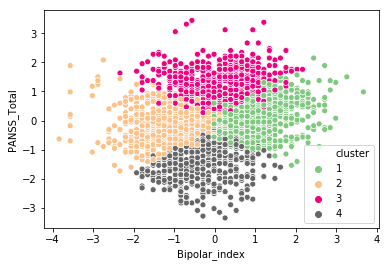

In [19]:
sns.scatterplot("Bipolar_index", "PANSS_Total", data=x, hue="cluster", palette="Accent")

In [20]:
x.cluster.value_counts()

1    871
2    806
3    735
4    588
Name: cluster, dtype: int64

For PANSS_Total we have:
Cluster 1 - Mean: 0.04667470747971869 Var: 0.2785514170469533
Cluster 2 - Mean: -0.13570567216980417 Var: 0.2572205933481011
Cluster 3 - Mean: 1.1617105759378576 Var: 0.3194796350720034
Cluster 4 - Mean: -1.3352587955107111 Var: 0.4396408121631136


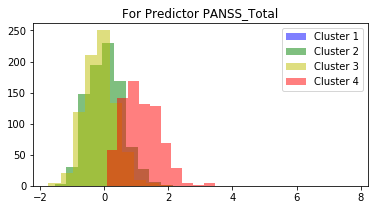

For Bipolar_index we have:
Cluster 1 - Mean: 0.9101521102746137 Var: 0.48592117905907173
Cluster 2 - Mean: -1.0014943320460932 Var: 0.49385773772752395
Cluster 3 - Mean: 0.15149637560965543 Var: 0.4932698705398105
Cluster 4 - Mean: -0.16477532736927628 Var: 0.4324910870474512


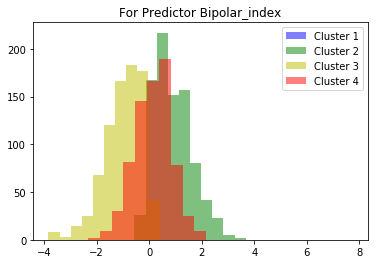

For Pos_Chronic we have:
Cluster 1 - Mean: 0.5890105904575765 Var: 0.6125806804404393
Cluster 2 - Mean: -0.7471500834631671 Var: 0.49387108444291006
Cluster 3 - Mean: 0.8704734251891342 Var: 0.18181098807946833
Cluster 4 - Mean: -0.9364340553252927 Var: 0.18803202369129354


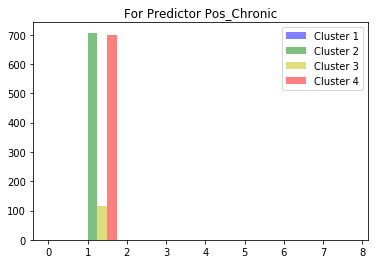

For Neg_Chronic we have:
Cluster 1 - Mean: -0.772189690720231 Var: 0.4419971419921289
Cluster 2 - Mean: 0.6429156020482693 Var: 0.5552936102685172
Cluster 3 - Mean: 0.9047095318984645 Var: 0.13671485651830534
Cluster 4 - Mean: -0.8683235724132033 Var: 0.2890155552402523


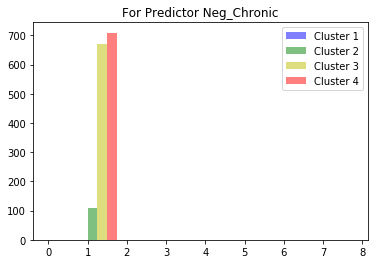

For P1 we have:
Cluster 1 - Mean: 0.5604014487179501 Var: 0.43290071869316277
Cluster 2 - Mean: -0.6114388968955842 Var: 0.632635542251637
Cluster 3 - Mean: 0.6928601310375467 Var: 0.47130027967176596
Cluster 4 - Mean: -0.8580648082450786 Var: 0.6925612631817214


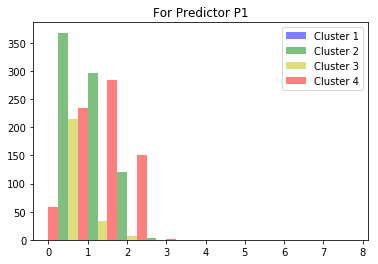

For P2 we have:
Cluster 1 - Mean: 0.08440900134069791 Var: 0.9633472797494401
Cluster 2 - Mean: -0.18599183745142603 Var: 0.5515769123689566
Cluster 3 - Mean: 0.7934290656108673 Var: 0.6766153459906464
Cluster 4 - Mean: -0.861872759193692 Var: 0.48834732047748963


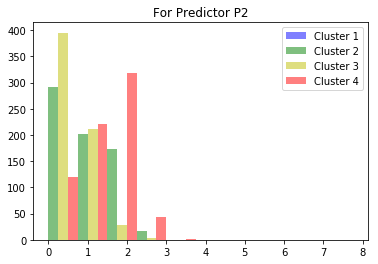

For P3 we have:
Cluster 1 - Mean: 0.38955676503105097 Var: 0.7651513307910288
Cluster 2 - Mean: -0.5928277136065383 Var: 0.7326950532139522
Cluster 3 - Mean: 0.6392797044290326 Var: 0.6257448089845314
Cluster 4 - Mean: -0.5635295713103963 Var: 0.6501742331500997


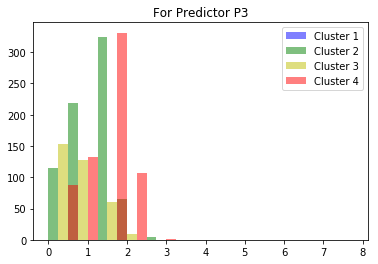

For P4 we have:
Cluster 1 - Mean: 0.4155959997297701 Var: 0.8581795637479989
Cluster 2 - Mean: -0.4823769133675361 Var: 0.6299955528096834
Cluster 3 - Mean: 0.532780259114306 Var: 0.8966208910237482
Cluster 4 - Mean: -0.6203772347609009 Var: 0.5352585119005382


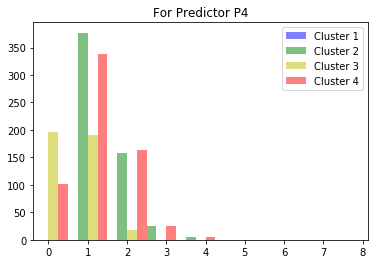

For P5 we have:
Cluster 1 - Mean: 0.37869510609477414 Var: 1.1582579124278067
Cluster 2 - Mean: -0.4742568280332172 Var: 0.43567251372170135
Cluster 3 - Mean: 0.3020561633057616 Var: 1.209692661437549
Cluster 4 - Mean: -0.2884416905501963 Var: 0.5630475771403545


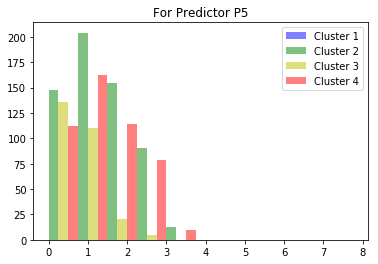

For P6 we have:
Cluster 1 - Mean: 0.41428002530869523 Var: 0.6467685929816098
Cluster 2 - Mean: -0.5253495632256205 Var: 0.6641055381547252
Cluster 3 - Mean: 0.7436302963295356 Var: 0.48997437856779114
Cluster 4 - Mean: -0.8230857515072239 Var: 0.6223686188865358


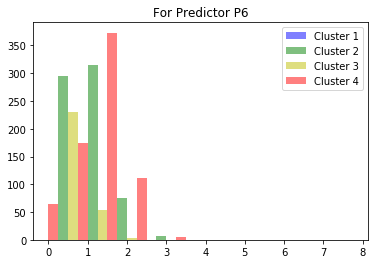

For P7 we have:
Cluster 1 - Mean: 0.27712698981199196 Var: 0.9886473045390041
Cluster 2 - Mean: -0.3388436255300642 Var: 0.6370478659677709
Cluster 3 - Mean: 0.484386621691862 Var: 1.179467318591325
Cluster 4 - Mean: -0.5515200899533025 Var: 0.4251844340093376


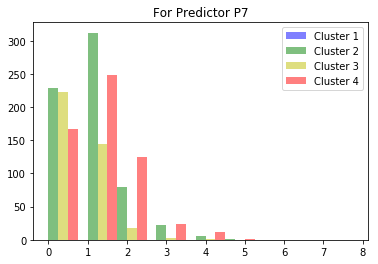

For N1 we have:
Cluster 1 - Mean: -0.6613197750613725 Var: 0.7160579301273656
Cluster 2 - Mean: 0.5903923135391262 Var: 0.543428662380022
Cluster 3 - Mean: 0.5459378423760499 Var: 0.7018357690129169
Cluster 4 - Mean: -0.5120935285382321 Var: 0.6614844513160769


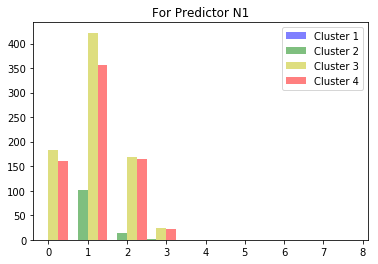

For N2 we have:
Cluster 1 - Mean: -0.5221984069448828 Var: 0.8463820651596181
Cluster 2 - Mean: 0.4892360846095422 Var: 0.49869929465194496
Cluster 3 - Mean: 0.6401169385684929 Var: 0.5661042740746111
Cluster 4 - Mean: -0.6972371115546381 Var: 0.7295167733879389


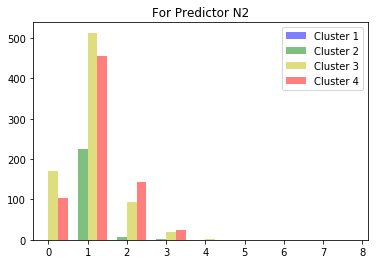

For N3 we have:
Cluster 1 - Mean: -0.5376621371765957 Var: 0.6314569709576999
Cluster 2 - Mean: 0.5267095576959038 Var: 0.6695186639323004
Cluster 3 - Mean: 0.6006215166077711 Var: 0.7303864469373835
Cluster 4 - Mean: -0.6763282257292645 Var: 0.6219128283419562


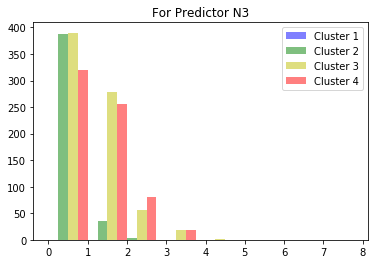

For N4 we have:
Cluster 1 - Mean: -0.490306737440397 Var: 0.7716314237620986
Cluster 2 - Mean: 0.48489698548037224 Var: 0.6010832309654908
Cluster 3 - Mean: 0.6004374474549288 Var: 0.6189595455816682
Cluster 4 - Mean: -0.688930826302666 Var: 0.7606927702630799


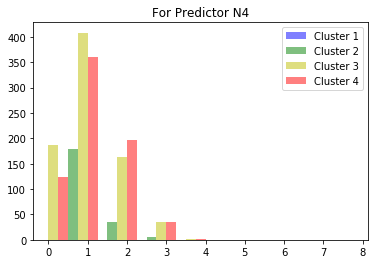

For N5 we have:
Cluster 1 - Mean: -0.2250027806913808 Var: 0.9081672871146115
Cluster 2 - Mean: 0.1562739830442475 Var: 0.9452341324783806
Cluster 3 - Mean: 0.46667082857536646 Var: 0.8656776741469622
Cluster 4 - Mean: -0.4642558968611705 Var: 0.787037629159953


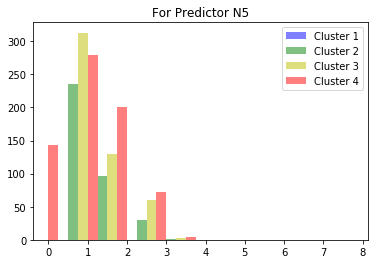

For N6 we have:
Cluster 1 - Mean: -0.6370926003707583 Var: 0.6353921525840838
Cluster 2 - Mean: 0.5250933771524446 Var: 0.6361154787600682
Cluster 3 - Mean: 0.6150118721764289 Var: 0.7806088794337398
Cluster 4 - Mean: -0.5448151923666892 Var: 0.5670702301099516


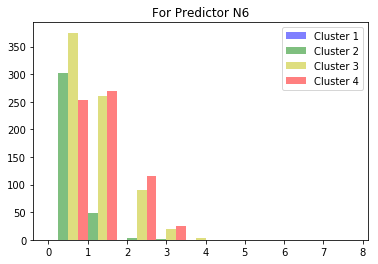

For N7 we have:
Cluster 1 - Mean: -0.07613781485468164 Var: 0.8111130154338809
Cluster 2 - Mean: 0.14876655956763316 Var: 0.8068997031270103
Cluster 3 - Mean: 0.5327360369414157 Var: 0.920503558045084
Cluster 4 - Mean: -0.7570591792942636 Var: 0.680811788099031


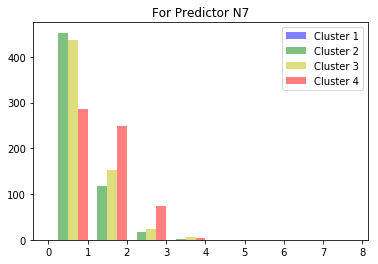

For G1 we have:
Cluster 1 - Mean: 0.13453544262989287 Var: 1.1243653767012765
Cluster 2 - Mean: -0.14630174562981707 Var: 0.7990264474385209
Cluster 3 - Mean: 0.20124126064879136 Var: 1.2017543913634114
Cluster 4 - Mean: -0.25029505124127066 Var: 0.6744097966968007


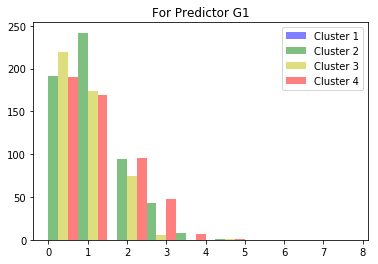

For G2 we have:
Cluster 1 - Mean: 0.333729062447223 Var: 0.8545038548272893
Cluster 2 - Mean: -0.32120242441101665 Var: 0.8383535285479609
Cluster 3 - Mean: 0.43702601760167803 Var: 0.8588730659542461
Cluster 4 - Mean: -0.6003452079140992 Var: 0.7118025943150614


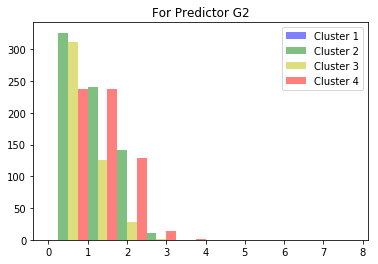

For G3 we have:
Cluster 1 - Mean: 0.1489000649142498 Var: 1.1176364064892952
Cluster 2 - Mean: -0.1575710878547436 Var: 0.7898888398903128
Cluster 3 - Mean: 0.14724046512594072 Var: 1.1836658122136514
Cluster 4 - Mean: -0.18862483264788196 Var: 0.7594664550036608


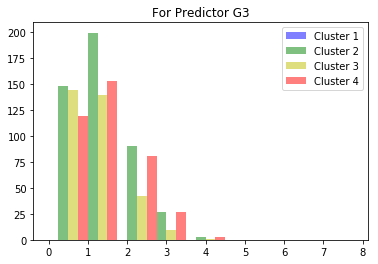

For G4 we have:
Cluster 1 - Mean: 0.20853596380006123 Var: 0.9138911272572727
Cluster 2 - Mean: -0.22048405163636944 Var: 0.8016741273512391
Cluster 3 - Mean: 0.5103269662592897 Var: 0.9241758957286951
Cluster 4 - Mean: -0.6445833317202688 Var: 0.6259571331488648


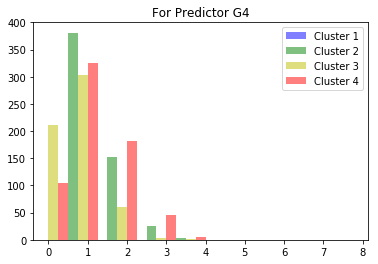

For G5 we have:
Cluster 1 - Mean: -0.294364785391865 Var: 0.7851298610624345
Cluster 2 - Mean: 0.2745907765018692 Var: 0.9413521974113507
Cluster 3 - Mean: 0.4581665129174672 Var: 1.049012721891251
Cluster 4 - Mean: -0.5130626271743547 Var: 0.5840854659044586


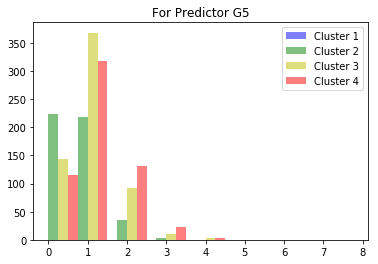

For G6 we have:
Cluster 1 - Mean: 0.15736527466591008 Var: 1.0216553029293676
Cluster 2 - Mean: -0.16789151912635425 Var: 0.8430295170581777
Cluster 3 - Mean: 0.30071714719556486 Var: 1.1317203653637538
Cluster 4 - Mean: -0.3788634234811339 Var: 0.691112811038452


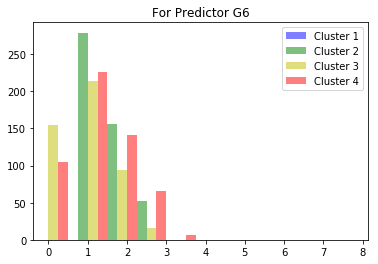

For G7 we have:
Cluster 1 - Mean: -0.5099779956870523 Var: 0.6632334832001056
Cluster 2 - Mean: 0.4195576198655397 Var: 0.8689964342561487
Cluster 3 - Mean: 0.41223410488797535 Var: 1.0775124042782762
Cluster 4 - Mean: -0.33497393615790666 Var: 0.6341777502675376


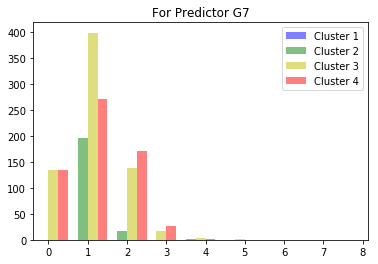

For G8 we have:
Cluster 1 - Mean: 0.061125172277247286 Var: 0.9480479484911375
Cluster 2 - Mean: -0.07607207036303051 Var: 0.8999698697880906
Cluster 3 - Mean: 0.4544976960993352 Var: 1.153539906944311
Cluster 4 - Mean: -0.5543907193433513 Var: 0.4472858689922259


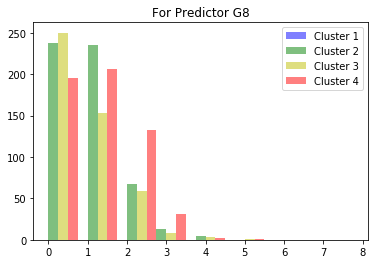

For G9 we have:
Cluster 1 - Mean: 0.38531183745466524 Var: 0.7301937591386034
Cluster 2 - Mean: -0.45660937543558155 Var: 0.5674639193786795
Cluster 3 - Mean: 0.6627151565444103 Var: 0.8202259701803298
Cluster 4 - Mean: -0.7732569623844433 Var: 0.5675177464609675


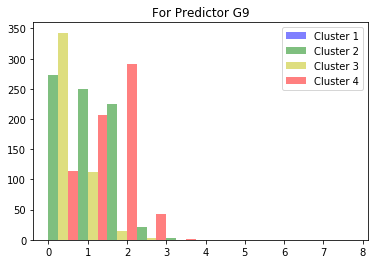

For G10 we have:
Cluster 1 - Mean: -0.11338448038003367 Var: 0.813057128730548
Cluster 2 - Mean: 0.007012666213084122 Var: 1.0471781084481107
Cluster 3 - Mean: 0.47400479390167183 Var: 1.0949809581601027
Cluster 4 - Mean: -0.4341630103307234 Var: 0.6094240330116687


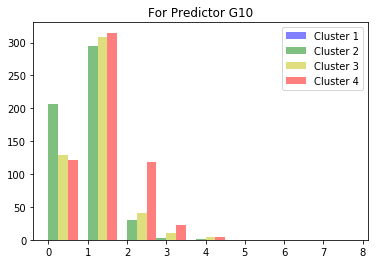

For G11 we have:
Cluster 1 - Mean: -0.14204223562810406 Var: 0.9131898649213532
Cluster 2 - Mean: 0.13559932898786695 Var: 0.7924366417426554
Cluster 3 - Mean: 0.6108203740611725 Var: 0.7089539537759646
Cluster 4 - Mean: -0.7389919164406613 Var: 0.7129574331124519


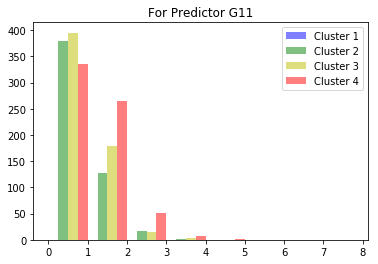

For G12 we have:
Cluster 1 - Mean: 0.1018660686082891 Var: 0.9695432047875141
Cluster 2 - Mean: 0.1089075451878278 Var: 0.80779402743399
Cluster 3 - Mean: 0.3218820339620865 Var: 0.9526004364290215
Cluster 4 - Mean: -0.7025308199682677 Var: 0.7173040886931961


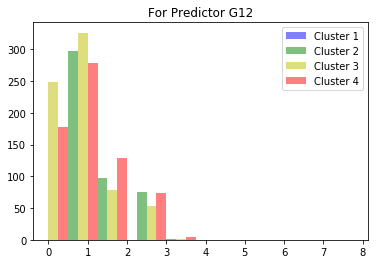

For G13 we have:
Cluster 1 - Mean: -0.2248193369570373 Var: 0.8665797289588624
Cluster 2 - Mean: 0.251775032064369 Var: 0.802797682457472
Cluster 3 - Mean: 0.5201500788376581 Var: 0.8657085608087962
Cluster 4 - Mean: -0.6622845940475873 Var: 0.7010377027317004


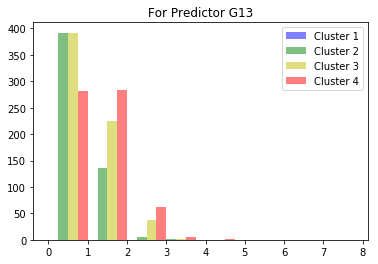

For G14 we have:
Cluster 1 - Mean: 0.26020536065139144 Var: 0.9556127191550745
Cluster 2 - Mean: -0.3195678732170275 Var: 0.7379089454397189
Cluster 3 - Mean: 0.4919216064915359 Var: 1.0336856076106664
Cluster 4 - Mean: -0.5622951430029175 Var: 0.5278006344037358


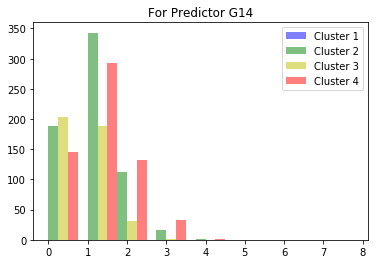

For G15 we have:
Cluster 1 - Mean: 0.016453186620776366 Var: 0.7463032357938968
Cluster 2 - Mean: -0.05253028557689471 Var: 0.7666307886817374
Cluster 3 - Mean: 0.6920689548280539 Var: 0.8439316392036244
Cluster 4 - Mean: -0.8174523761400317 Var: 0.6230310231250118


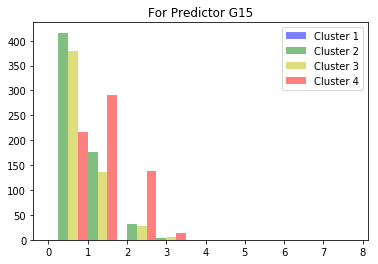

For G16 we have:
Cluster 1 - Mean: 0.03435157877275372 Var: 0.9822425139554685
Cluster 2 - Mean: -0.020534415671244376 Var: 0.7361628807887971
Cluster 3 - Mean: 0.565127827947628 Var: 0.7867558058223776
Cluster 4 - Mean: -0.7291470061591016 Var: 0.7251133925693889


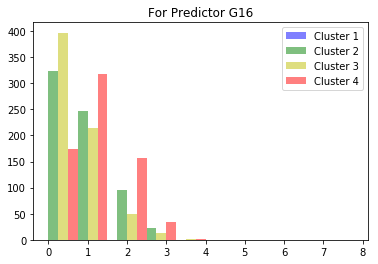

For cluster we have:
Cluster 1 - Mean: 1.0 Var: 0.0
Cluster 2 - Mean: 2.0 Var: 0.0
Cluster 3 - Mean: 3.0 Var: 0.0
Cluster 4 - Mean: 4.0 Var: 0.0


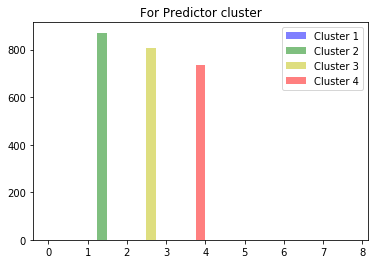

In [21]:
k.quality_of_cluster(x, x.cluster, 4, x.columns)

## GMM

In [22]:
x, e = k.data_question2()
scores = ['PANSS_Total', 'Bipolar_index', 'Pos_Chronic', 'Neg_Chronic', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16']
#ONLY VARIABLES
variables = ['PANSS_Total','Bipolar_index', 'Pos_Chronic', 'Neg_Chronic', 'PANSS_Total']
x = x[scores]

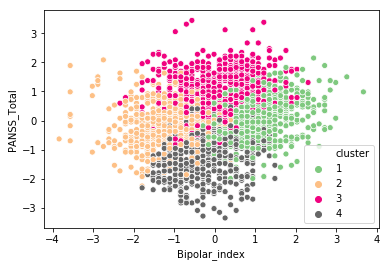

In [23]:
x =(x_vars-x_vars.mean())/x_vars.std()
gmm = GaussianMixture(n_components=4, random_state=118, covariance_type='full').fit_predict(x)
x["cluster"] = gmm + 1
x.groupby("cluster")[x.columns].mean().round(1)
sns.scatterplot("Bipolar_index", "PANSS_Total", data=x, hue="cluster", palette="Accent")

In [ ]:
k.quality_of_cluster(x, x["cluster"], 3)

# SELECTING FEATURES WITH HIGH VARIANCE

In [24]:
x, e = k.data_question2()
#POS, NEG, and GEN
x_posit = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'Pos_Total', 'Pos_Chronic']
x_negat = ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'Neg_Total', 'Neg_Chronic']
x_general = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16']
x_pos = x[x_posit]
x_neg = x[x_negat]
x_general1 = x[x_general]

In [25]:
x[x_posit].var().sort_values()

Pos_Chronic     0.249783
P7              1.197663
P4              1.226727
P2              1.531710
P6              1.635697
P5              1.711209
P1              1.786780
P3              2.588116
Pos_Total      35.189112
dtype: float64

In [26]:
x[x_negat].var().sort_values()

Neg_Chronic     0.249931
N2              0.944423
N7              1.057232
N3              1.126150
N1              1.149476
N4              1.155598
N5              1.333900
N6              1.358234
Neg_Total      25.394865
dtype: float64

In [27]:
x[x_general].std().sort_values()

G11    1.037937
G10    1.052804
G13    1.066634
G5     1.067446
G7     1.071563
G14    1.079565
G4     1.086458
G8     1.093006
G3     1.133229
G15    1.139254
G16    1.167360
G1     1.172113
G12    1.222867
G6     1.239260
G2     1.247921
G9     1.346122
dtype: float64

**HIGH VAR + Totals**

In [28]:
high_var_ratings = ["P3", "P5", "N5", "N6", "G6", "G9", "Pos_Total", "Neg_Total", "Pos_Chronic", "Neg_Chronic", "PANSS_Total" , "Bipolar_index"]
x = x[high_var_ratings]

## KMEANS

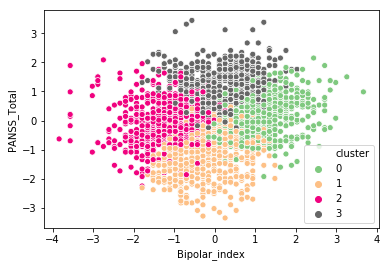

In [32]:
x =(x-x.mean())/x.std()
predict = KMeans(n_clusters = 4, random_state=0).fit_predict(x)
x["cluster"] = predict
x.groupby("cluster")[x.columns].mean().round(1)
sns.scatterplot("Bipolar_index", "PANSS_Total", data=x, hue="cluster", palette="Accent")

## GMM

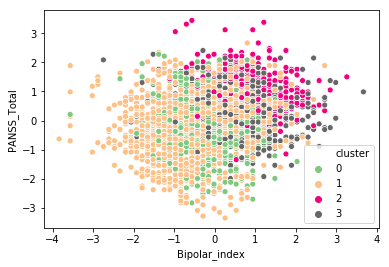

In [41]:
x, e = k.data_question2()
high_var_ratings = ["P3", "P5", "N5", "N6", "G6", "G9", "Pos_Total", "Neg_Total", "Pos_Chronic", "Neg_Chronic", "PANSS_Total" , "Bipolar_index"]
high_var_ratings_clean = ["P3", "P5", "N5", "N6", "G6", "G9", "Pos_Total", "Neg_Total", "PANSS_Total" , "Bipolar_index"]
x = x[high_var_ratings]
x =(x-x.mean())/x.std()
gmm = GaussianMixture(n_components=4, covariance_type='full').fit_predict(x[high_var_ratings_clean])
x["cluster"] = gmm
x.groupby("cluster")[x.columns].mean().round(1)
sns.scatterplot("Bipolar_index", "PANSS_Total", data=x, hue="cluster", palette="Accent")